(50, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
         RND      ADMIN        MKT       STATE     PROFIT
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94


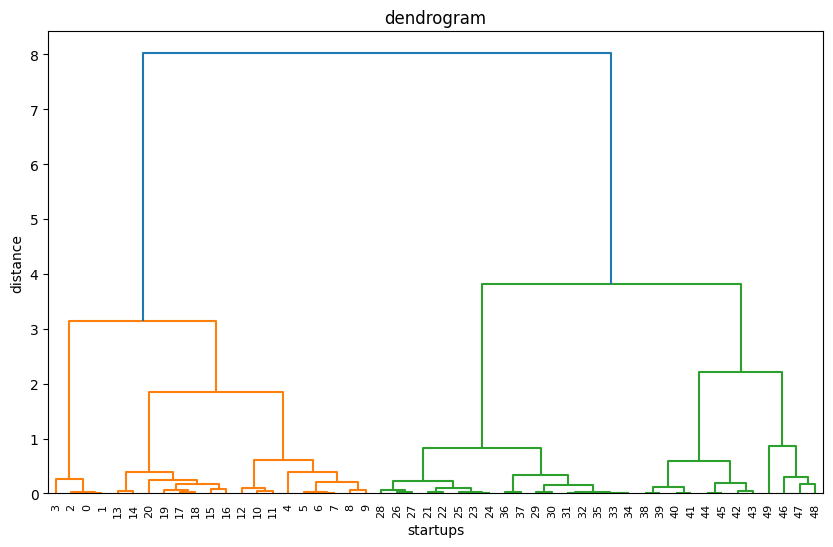

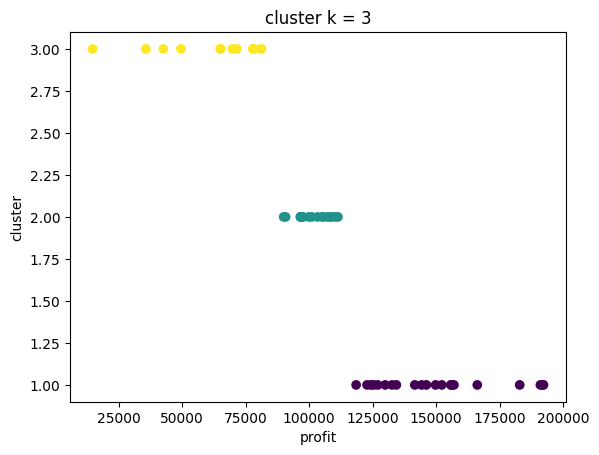

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

df = pd.read_csv("50_Startups.csv")
print(df.shape)
print(df.info())
print(df.head())

df.fillna(df.mode().loc[0], inplace=True)

le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = le.fit_transform(df[col])

x = df[["PROFIT"]]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

linked = linkage(x_scaled, method="ward")

plt.figure(figsize=(10,6))
dendrogram(linked)
plt.title("dendrogram")
plt.xlabel("startups")
plt.ylabel("distance")
plt.show()

clusters = fcluster(linked, 3, criterion="maxclust")
df["Cluster"] = clusters

plt.scatter(df["PROFIT"], df["Cluster"], c=df["Cluster"])
plt.title("cluster k = 3")
plt.xlabel("profit")
plt.ylabel("cluster")
plt.show()